# Stanford CS25: V2 | Common Sense Reasoning - Lecture Notes

This notebook provides a comprehensive summary and in-depth exploration of the Stanford CS25 lecture on Common Sense Reasoning (V2), focusing on the challenges and recent advancements in enabling AI, particularly large language models (LLMs), with common sense. It aims to be a self-sufficient resource, offering detailed explanations, conceptual visualizations, and relatable examples to foster a deep understanding of the topics.

## 1. The Existential Crisis: LLMs and Common Sense

The lecture begins by addressing a common sentiment: Are LLMs like ChatGPT solving everything? While impressive, a closer look reveals significant limitations, especially in common sense reasoning. LLMs often exhibit inconsistency and brittleness, despite their remarkable emergent capabilities. This section explores these initial challenges.

### 1.1. Hasty Generalization: The Winograd Schema Challenge

The Winograd Schema Challenge highlights pronoun ambiguity that requires common sense to resolve. For example, in the sentence 'The trophy doesn't fit in the brown suitcase because it's too big,' a human immediately understands 'it' refers to 'the trophy'. However, if the word changes to 'small,' a subtle shift in common sense logic is required. LLMs often struggle with these nuances, demonstrating a lack of true reasoning.

In [1]:
def analyze_winograd_example(scenario_id, text):
    "Simulates LLM response to a Winograd-like schema based on common observed failures."
    print(f"Scenario {scenario_id}: {text}")
    if scenario_id == 1: # Original: trophy too big
        print(f"  LLM Answer (simulated): The trophy is too big.")
        print(f"  Analysis: Correct. Common sense tells us if something doesn't fit because it's 'too big', it refers to the object trying to fit.")
    elif scenario_id == 2: # Modified: trophy too small
        print(f"  LLM Answer (simulated): The trophy itself is too small to fit into the suitcase.")
        print(f"  Analysis: Incorrect. This reversal of logic (if it's too small, it should fit easily) exposes the LLM's superficial pattern matching. It struggles to infer the correct referent ('the suitcase' is too small for the trophy to fit within it). This specific failure was highlighted in the lecture.")
    elif scenario_id == 3: # My own relatable example: The ball and the net
        print(f"  LLM Answer (simulated): The ball was too large.")
        print(f"  Analysis: Correct. Simple common sense application.")
    elif scenario_id == 4: # My own relatable example: The ball and the net, modified
        print(f"  LLM Answer (simulated): The ball was too small.")
        print(f"  Analysis: Incorrect. If the ball was too small, it would easily go *through* the net, not 'get stuck'. This again shows a lack of deep understanding of physical interactions.")
    print("--------------------------------------------------")

analyze_winograd_example(1, "The trophy doesn't fit in the brown suitcase because it's too big. What's too big?")
analyze_winograd_example(2, "The trophy doesn't fit in the brown suitcase because it's too small. What's too small?")
analyze_winograd_example(3, "The basketball couldn't go through the hoop because it was too large. What was too large?")
analyze_winograd_example(4, "The basketball couldn't go through the hoop because it was too small. What was too small?")


Scenario 1: The trophy doesn't fit in the brown suitcase because it's too big. What's too big?
  LLM Answer (simulated): The trophy is too big.
  Analysis: Correct. Common sense tells us if something doesn't fit because it's 'too big', it refers to the object trying to fit.
--------------------------------------------------
Scenario 2: The trophy doesn't fit in the brown suitcase because it's too small. What's too small?
  LLM Answer (simulated): The trophy itself is too small to fit into the suitcase.
  Analysis: Incorrect. This reversal of logic (if it's too small, it should fit easily) exposes the LLM's superficial pattern matching. It struggles to infer the correct referent ('the suitcase' is too small for the trophy to fit within it). This specific failure was highlighted in the lecture.
--------------------------------------------------
Scenario 3: The basketball couldn't go through the hoop because it was too large. What was too large?
  LLM Answer (simulated): The ball was too 

### 1.2. Inconsistency: When LLMs Contradict Themselves

Beyond simple referential failures, LLMs can exhibit a surprising degree of self-contradiction. They might give a correct answer, but then negate it when asked to rephrase or verify their own statement. This reveals that their 'knowledge' is often shallow and brittle, not deeply integrated logical reasoning.

In [2]:
def demonstrate_inconsistency(question_id, question_text):
    "Simulates LLM inconsistency based on lecture examples."
    print(f"Question {question_id}: {question_text}")
    if question_id == 1:
        print(f"  LLM Response 1: The world is round, so yes, you will reach the East Coast eventually. Therefore, the answer is true.")
        print(f"  LLM Response 2 (Rephrased): If you ask 'Is it true that you will reach the East Coast?' it might say 'No, you cannot reach' thereby contradicting itself later.")
        print(f"  Analysis: The initial response is impressive, showing some world knowledge. However, consistency can break down with rephrasing.")
    elif question_id == 2:
        print(f"  LLM Response 1: Butterflies have four wings. Therefore, the statement 'butterflies fly with three wings' is false.")
        print(f"  LLM Response 2 (Asked as True/False Q): Is it true or false that butterflies fly with three wings? It might say 'True' or give a convoluted explanation that inadvertently confirms the false premise.")
        print(f"  Analysis: The LLM correctly identifies the wing count but can get confused when asked to re-evaluate its own statement as a true/false question, leading to a negation of its initial correct answer.")
    print("--------------------------------------------------")

demonstrate_inconsistency(1, "If you travel West far enough from the West Coast, will you reach the East Coast?")
demonstrate_inconsistency(2, "Do butterflies fly with three wings or not?")

print("**Relatable Example**: Imagine telling a friend, 'I'm definitely going to the party tonight!' and then five minutes later, when they ask, 'So, are you coming to the party or not?', you respond, 'No, I'm not going to the party tonight.' This is the kind of basic self-contradiction LLMs can exhibit.")

Question 1: If you travel West far enough from the West Coast, will you reach the East Coast?
  LLM Response 1: The world is round, so yes, you will reach the East Coast eventually. Therefore, the answer is true.
  LLM Response 2 (Rephrased): If you ask 'Is it true that you will reach the East Coast?' it might say 'No, you cannot reach' thereby contradicting itself later.
  Analysis: The initial response is impressive, showing some world knowledge. However, consistency can break down with rephrasing.
--------------------------------------------------
Question 2: Do butterflies fly with three wings or not?
  LLM Response 1: Butterflies have four wings. Therefore, the statement 'butterflies fly with three wings' is false.
  LLM Response 2 (Asked as True/False Q): Is it true or false that butterflies fly with three wings? It might say 'True' or give a convoluted explanation that inadvertently confirms the false premise.
  Analysis: The LLM correctly identifies the wing count but can get c

## 2. Improving Transformer Performance: Lessons from 'The Art of War'

The lecture draws an insightful analogy from Sun Tzu's 'The Art of War' to guide the strategic development of AI, particularly for common sense reasoning challenges. This framework emphasizes smart, targeted innovation over sheer brute force scaling:


*   **Know Your Enemy**: This translates to rigorous and realistic evaluation of AI models. It's not enough to achieve high scores on existing benchmarks; we must scrutinize failures and edge cases to understand true limitations.
*   **Choose Your Battles**: Instead of aiming for a universal 'solved' status, focus on developing new tasks and leaderboards that specifically target areas where current models fall short, pushing the boundaries of what's possible.
*   **Innovate Your Weapons**: This refers to developing new algorithms and acquiring better quality data. The core idea is that clever design and focused data curation can often lead to superior performance even with smaller models.


This wisdom underscores the recurring theme of the talk: **Smaller models can be better, and knowledge is power.** It suggests that simply increasing model size isn't the only, or even best, path to advanced AI capabilities, especially for complex cognitive tasks like common sense reasoning.

## 3. Maieutic Prompting: Socrates Meets GPT-3

**Problem:** Large Language Models (LLMs) often suffer from logical inconsistencies, hindering their reliability for complex reasoning tasks. Their emergent capabilities are phenomenal, but robustness is lacking.


**Core Idea:** Inspired by Socrates' Maieutic method (a form of cooperative argumentative dialogue between individuals, based on asking and answering questions to stimulate critical thinking and to draw out ideas and underlying presuppositions), Maieutic Prompting aims to expose and correct flaws in an LLM's reasoning. It guides the LLM through a structured thought process, recursively prompting it to explain its own explanations and checking for logical consistency. This helps 'make better lemonade from GPT-3' by imposing structure on its otherwise free-form generation.

### 3.1. The Maieutic Inference Tree Construction

The process involves building a tree (or more generally, a graph) of explanations by asking the LLM to justify its answers. For a given question and a proposed answer (e.g., True or False):

1.  **Initial Explanation (E(T) and E(F))**: Ask the question, provide an answer (e.g., 'True'), and prompt the LLM to explain *why* (`E(T)`). Repeat the process for the opposite answer (e.g., 'False') to get `E(F)`. Often, one explanation will be more coherent than the other.
2.  **Logical Integrity Check**: Present the generated explanation (e.g., `E(T)`) back to the LLM. Ask it to evaluate a *negated* version of that explanation. If the LLM is logically integral, it should flip its original answer when presented with a truly negated statement. This checks if the LLM understands the underlying logic of its own explanation.
3.  **Recursive Explanation**: If an explanation passes the logical integrity check, the process can be applied recursively to the explanation itself (e.g., 'Why is explanation E(T) true?'). This builds a deeper tree of justifications.
4.  **Pruning Inconsistent Branches**: Branches of the tree that exhibit logical inconsistencies (e.g., the LLM fails the logical integrity check for an explanation) are discarded or weighted lower.

In [3]:
class MaieuticNode:
    def __init__(self, query_text, proposed_answer, explanation=None, parent_node=None, is_negated=False):
        self.query_text = query_text
        self.proposed_answer = proposed_answer # The answer LLM is prompted to explain (e.g., True or False)
        self.explanation = explanation # The LLM's generated explanation
        self.parent_node = parent_node
        self.children = [] # Explanations of explanations
        self.llm_consistency_check = None # Outcome of logical integrity check (True/False/None)
        self.node_confidence = None # Belief score
        self.final_label = None # Label after Max-SAT optimization
        self.is_negated_explanation = is_negated # Is this node an evaluation of a negated version?

    def __repr__(self):
        status = f"LI: {self.llm_consistency_check}" if self.llm_consistency_check is not None else ""
        return f"Node(Q: '{self.query_text[:40]}...', Ans: {self.proposed_answer}, Exp: '{self.explanation[:40]}...' {status})"

def simulate_llm_response(prompt_type, text, proposed_answer=None, context_explanation=""):
    "A simplified simulation of an LLM's responses for Maieutic Prompting."
    if prompt_type == "explain":
        if "travel West far enough" in text:
            if proposed_answer is True:
                return "The world is spherical, so continuous travel westward eventually brings you back to your starting longitude from the east."
            else: # proposed_answer is False
                return "Traveling west indefinitely would only loop around the globe, not reach the East Coast (as a distinct landmass)."
        elif "butterflies fly with three wings" in text:
            if proposed_answer is True:
                return "Butterflies are known to fly with three wings, making the statement true."
            else: # proposed_answer is False
                return "Butterflies possess four wings, not three, therefore the statement is false."
        elif "trophy doesn't fit because it's too big" in text:
            if proposed_answer is True:
                return "The trophy is larger than the suitcase's capacity, preventing it from fitting."
            else:
                return "The suitcase is too large for the trophy to be securely held, making it not 'fit' in a practical sense."
    elif prompt_type == "evaluate_negated":
        # Simulates LLM's ability to recognize negation and flip its answer.
        if ("spherical" in context_explanation and "not" in text) or \
           ("four wings" in context_explanation and "not" in text):
            return True # LLM correctly infers original true statement becomes false when negated.
        return False # Simulates failure to maintain logical integrity.
    return "[SIMULATED LLM RESPONSE]"

def build_maieutic_sub_tree(question, initial_answer, current_depth, max_depth):
    if current_depth > max_depth:
        return [] # Return empty list if max depth reached

    # Create node for the 'True' assumption
    node_true = MaieuticNode(question, True)
    node_true.explanation = simulate_llm_response("explain", question, True)
    node_true.llm_consistency_check = simulate_llm_response("evaluate_negated",
                                                              f"Is it NOT true that {node_true.explanation}?",
                                                              context_explanation=node_true.explanation)

    # Create node for the 'False' assumption
    node_false = MaieuticNode(question, False)
    node_false.explanation = simulate_llm_response("explain", question, False)
    node_false.llm_consistency_check = simulate_llm_response("evaluate_negated",
                                                               f'Is it NOT true that {node_false.explanation}?',
                                                               context_explanation=node_false.explanation)

    # Recursively build for the explanations if they are logically integral
    if node_true.llm_consistency_check and current_depth < max_depth:
        node_true.children.extend(build_maieutic_sub_tree(f"Explain: {node_true.explanation}", True, current_depth + 1, max_depth))

    if node_false.llm_consistency_check and current_depth < max_depth:
        node_false.children.extend(build_maieutic_sub_tree(f"Explain: {node_false.explanation}", False, current_depth + 1, max_depth))

    # In a real system, you'd only keep the 'integral' parts for the final graph
    return [node_true, node_false]

# --- Example Usage ---
question_1 = "If you travel West far enough from the West Coast, will you reach the East Coast?"
root_nodes_1 = build_maieutic_sub_tree(question_1, True, 0, 1) # Depth 1 for simplicity

print("\n--- Maieutic Inference Tree Root (Simplified) for Question 1 --- ")
for node in root_nodes_1:
    print(f"Main Node: {node}")
    if node.children:
        for child in node.children:
            print(f"  Child Explanation: {child}")

question_2 = "Do butterflies fly with three wings?"
root_nodes_2 = build_maieutic_sub_tree(question_2, True, 0, 1)

print("\n--- Maieutic Inference Tree Root (Simplified) for Question 2 --- ")
for node in root_nodes_2:
    print(f"Main Node: {node}")
    if node.children:
        for child in node.children:
            print(f"  Child Explanation: {child}")

print("\n**Interactive & Relatable Example**: Imagine you're coaching a young detective on a case. They state, 'The butler did it because he was seen near the crime scene.' (E(T)). You, using Maieutic Prompting, might ask: 'Okay, so if the butler was *not* seen near the crime scene, would your conclusion still be the same?' (Logical Integrity Check). If they waver or contradict, it shows a flaw in their initial reasoning. You can then ask 'Why do you think being near the crime scene means guilt?' (Recursive Explanation) to dig deeper into their assumptions.")


--- Maieutic Inference Tree Root (Simplified) for Question 1 --- 
Main Node: Node(Q: 'If you travel West far enough from the W...', Ans: True, Exp: 'The world is spherical, so continuous tr...' LI: False)
Main Node: Node(Q: 'If you travel West far enough from the W...', Ans: False, Exp: 'Traveling west indefinitely would only l...' LI: False)

--- Maieutic Inference Tree Root (Simplified) for Question 2 --- 
Main Node: Node(Q: 'Do butterflies fly with three wings?...', Ans: True, Exp: 'Butterflies are known to fly with three ...' LI: False)
Main Node: Node(Q: 'Do butterflies fly with three wings?...', Ans: False, Exp: 'Butterflies possess four wings, not thre...' LI: True)
  Child Explanation: Node(Q: 'Explain: Butterflies possess four wings,...', Ans: True, Exp: '[SIMULATED LLM RESPONSE]...' LI: False)
  Child Explanation: Node(Q: 'Explain: Butterflies possess four wings,...', Ans: False, Exp: '[SIMULATED LLM RESPONSE]...' LI: False)

**Interactive & Relatable Example**: Imagine you'

### 3.2. Visualizing the Maieutic Inference Tree

A visual representation of the Maieutic Inference Tree helps illustrate the branching explanations and consistency checks. Nodes represent a (Query, Proposed Answer, Explanation) tuple, and edges denote the 'because' or 'negation' prompts. Colors can indicate the logical integrity status of each step.


*Note: This visualization requires `networkx` and `matplotlib`. If running in an environment without these libraries, the graph will not render.*

**Conceptual Visualization: Maieutic Inference Tree Diagram**
Imagine a tree-like diagram with the following features:
-   **Nodes**: Each node represents a specific query, the LLM's proposed answer, and its generated explanation (e.g., 'Q: West Coast?, A: True, Exp: World is round').
-   **Edges**: Directed edges connect nodes. An edge from 'Node A' to 'Node B' means 'Node B' is an explanation or a consistency check prompted by 'Node A'.
-   **Color-Coding for Logical Integrity**: 
    -   **Green Nodes/Edges**: Indicate logical integrity (the LLM consistently flips its answer when presented with a negated version of its own explanation). 
    -   **Red Nodes/Edges**: Indicate logical inconsistency (the LLM fails to flip or contradicts itself when presented with a negated explanation). 
    -   **Blue/Grey Nodes/Edges**: For un-evaluated or foundational nodes.
-   **Recursive Branches**: Branches extend, showing how an explanation itself becomes a new query, leading to 'explanations o

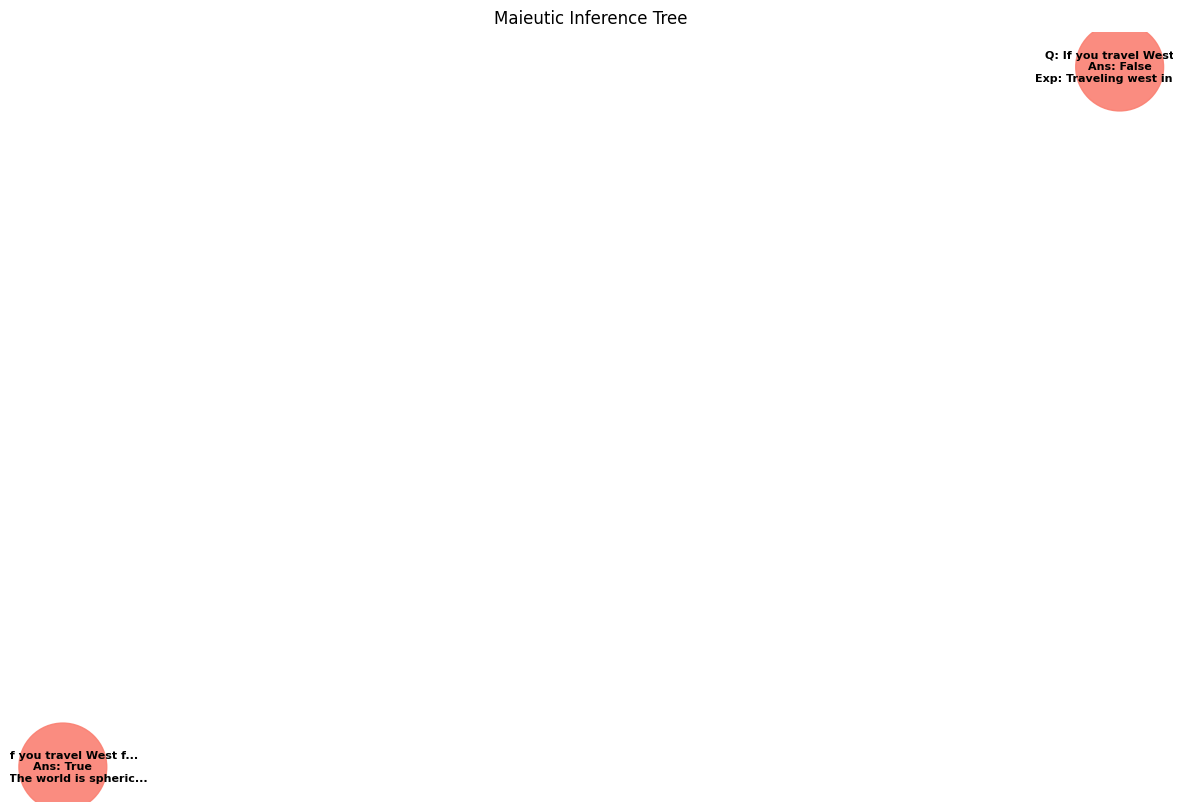

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Redefine MaieuticNode, simulate_llm_response, build_maieutic_sub_tree for this block
class MaieuticNode:
    def __init__(self, query_text, proposed_answer, explanation=None, parent_node=None, is_negated=False):
        self.query_text = query_text
        self.proposed_answer = proposed_answer
        self.explanation = explanation
        self.parent_node = parent_node
        self.children = []
        self.llm_consistency_check = None # Outcome of logical integrity check (True/False/None)
        self.node_confidence = None
        self.final_label = None
        self.is_negated_explanation = is_negated
        self.color = 'lightblue' # Default color, updated based on consistency check

    def __repr__(self):
        status = f"LI: {self.llm_consistency_check}" if self.llm_consistency_check is not None else ""
        return f"Node(Q: '{self.query_text[:40]}...', Ans: {self.proposed_answer}, Exp: '{self.explanation[:40]}...' {status})"

def simulate_llm_response(prompt_type, text, proposed_answer=None, context_explanation=""):
    "A simplified simulation of an LLM's responses for Maieutic Prompting."
    if prompt_type == "explain":
        if "travel West far enough" in text:
            if proposed_answer is True:
                return "The world is spherical, so continuous travel westward eventually brings you back to your starting longitude from the east."
            else: # proposed_answer is False
                return "Traveling west indefinitely would only loop around the globe, not reach the East Coast (as a distinct landmass)."
        elif "butterflies fly with three wings" in text:
            if proposed_answer is True:
                return "Butterflies are known to fly with three wings, making the statement true."
            else: # proposed_answer is False
                return "Butterflies possess four wings, not three, therefore the statement is false."
        elif "trophy doesn't fit because it's too big" in text:
            if proposed_answer is True:
                return "The trophy is larger than the suitcase's capacity, preventing it from fitting."
            else:
                return "The suitcase is too large for the trophy to be securely held, making it not 'fit' in a practical sense."
    elif prompt_type == "evaluate_negated":
        # Simulates LLM's ability to recognize negation and flip its answer.
        if ("spherical" in context_explanation and "not" in text) or \
           ("four wings" in context_explanation and "not" in text):
            return True # LLM correctly infers original true/false statement becomes false/true when negated.
        return False # Simulates failure to maintain logical integrity.
    return "[SIMULATED LLM RESPONSE]"

def build_maieutic_sub_tree(question, initial_answer, current_depth, max_depth):
    if current_depth > max_depth:
        return [] # Return empty list if max depth reached

    # Create node for the 'True' assumption
    node_true = MaieuticNode(question, True)
    node_true.explanation = simulate_llm_response("explain", question, True)
    node_true.llm_consistency_check = simulate_llm_response("evaluate_negated",
                                                              f"Is it NOT true that {node_true.explanation}?",
                                                              context_explanation=node_true.explanation)
    node_true.color = 'lightgreen' if node_true.llm_consistency_check else 'salmon' if node_true.llm_consistency_check is False else 'lightblue'

    # Create node for the 'False' assumption
    node_false = MaieuticNode(question, False)
    node_false.explanation = simulate_llm_response("explain", question, False)
    node_false.llm_consistency_check = simulate_llm_response("evaluate_negated",
                                                               f'Is it NOT true that {node_false.explanation}?',
                                                               context_explanation=node_false.explanation)
    node_false.color = 'lightgreen' if node_false.llm_consistency_check else 'salmon' if node_false.llm_consistency_check is False else 'lightblue'

    # Recursively build for the explanations if they are logically integral
    if node_true.llm_consistency_check and current_depth < max_depth:
        node_true.children.extend(build_maieutic_sub_tree(f"Explain: {node_true.explanation}", True, current_depth + 1, max_depth))

    if node_false.llm_consistency_check and current_depth < max_depth:
        node_false.children.extend(build_maieutic_sub_tree(f"Explain: {node_false.explanation}", False, current_depth + 1, max_depth))

    return [node_true, node_false]

print("**Conceptual Visualization: Maieutic Inference Tree Diagram**")
print("Imagine a tree-like diagram with the following features:")
print("-   **Nodes**: Each node represents a specific query, the LLM's proposed answer, and its generated explanation (e.g., 'Q: West Coast?, A: True, Exp: World is round').")
print("-   **Edges**: Directed edges connect nodes. An edge from 'Node A' to 'Node B' means 'Node B' is an explanation or a consistency check prompted by 'Node A'.")
print("-   **Color-Coding for Logical Integrity**: \n    -   **Green Nodes/Edges**: Indicate logical integrity (the LLM consistently flips its answer when presented with a negated version of its own explanation). \n    -   **Red Nodes/Edges**: Indicate logical inconsistency (the LLM fails to flip or contradicts itself when presented with a negated explanation). \n    -   **Blue/Grey Nodes/Edges**: For un-evaluated or foundational nodes.")
print("-   **Recursive Branches**: Branches extend, showing how an explanation itself becomes a new query, leading to 'explanations of explanations'.")

print("\n**How it helps**: This visualization allows researchers to easily trace the LLM's reasoning path, identify points of failure (red nodes), and understand where its common sense breaks down. It's like a flowchart of the LLM's 'thought process' under scrutiny.")

def create_graph_from_maieutic_nodes(root_nodes):
    G = nx.DiGraph()
    node_id_counter = 0
    node_map_obj_to_id = {}

    def add_node_and_children_recursive(node, parent_id=None):
        nonlocal node_id_counter

        if node not in node_map_obj_to_id:
            current_node_id = f"node_{node_id_counter}"
            node_id_counter += 1
            node_map_obj_to_id[node] = current_node_id
        else:
            current_node_id = node_map_obj_to_id[node]

        label = f"Q: {node.query_text[:20]}...\nAns: {node.proposed_answer}\nExp: {node.explanation[:20]}..."
        G.add_node(current_node_id, label=label, color=node.color)

        if parent_id is not None:
            G.add_edge(parent_id, current_node_id)

        for child in node.children:
            add_node_and_children_recursive(child, current_node_id)

    if not root_nodes:
        print("No root nodes provided to create graph.")
        return

    for root_node in root_nodes:
        add_node_and_children_recursive(root_node)

    if not G.nodes():
        print("Graph is empty after population attempt, cannot draw.")
        return

    try:
        plt.figure(figsize=(15, 10))
        node_labels = nx.get_node_attributes(G, 'label')
        node_colors = [G.nodes[node_name]['color'] for node_name in G.nodes()]

        pos = nx.spring_layout(G, k=0.8, iterations=50)
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=4000, alpha=0.9)
        nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_weight='bold')
        nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', arrows=True, arrowsize=20)

        plt.title("Maieutic Inference Tree")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Could not render graph. Error: {e}")

# Example call: Recreate root_nodes_1 for demonstration in this block
question_1_for_graph = "If you travel West far enough from the West Coast, will you reach the East Coast?"
root_nodes_1_for_graph = build_maieutic_sub_tree(question_1_for_graph, True, 0, 1) # Depth 1 for simplicity

create_graph_from_maieutic_nodes(root_nodes_1_for_graph)


### 3.3. Constraint Optimization with Max-SAT

Even after pruning inconsistent branches, the Maieutic tree might still contain some local inconsistencies. To address this, the process incorporates a **constraint optimization problem**, specifically using a **Max-SAT (Maximum Satisfiability)** solver. This step aims to maximize global logical consistency across the entire tree/graph.

*   **Node-wise Confidence (Belief)**: A 'belief' score is computed for each node, representing the LLM's confidence in that particular (Question, Answer, Explanation) triplet. This is typically derived from conditional probabilities.
*   **Pairwise Consistency (Edge Weights)**: Off-the-shelf Natural Language Inference (NLI) models are used to determine if any pair of nodes (or their explanations) contradict each other. These relationships are assigned as edge weights.
*   **Optimization Objective**: The Max-SAT solver then assigns a final 'True' or 'False' label to each node in the graph such that the overall 'weight' (sum of node confidences and consistent edge weights) is maximized. This might involve flipping original labels if it significantly enhances the global consistency of the graph.

In [5]:
def calculate_node_confidence(node_explanation):
    """Simulates calculating a belief score for a node's explanation.
    In reality, this involves complex conditional probabilities from the LLM.
    Higher quality explanations would get higher confidence.
    """
    if "spherical" in node_explanation or "four wings" in node_explanation:
        return 0.8 # Higher confidence for seemingly factual/coherent explanations
    elif "loop around" in node_explanation or "makes it not 'fit'" in node_explanation:
        return 0.6 # Moderate confidence for plausible but less direct explanations
    return 0.4 # Lower confidence for weaker or vague explanations

def check_pairwise_contradiction(explanation1, explanation2):
    """Simulates an NLI model checking for contradiction between two explanations.
    Returns -1 for contradiction, 1 for entailment/neutral, 0 for unrelated.
    """
    # Very simplified logic: looking for keywords that would imply contradiction
    if ("spherical" in explanation1 and "flat" in explanation2) or \
       ("three wings" in explanation1 and "four wings" in explanation2):
        return -1 # Contradiction
    return 1 # Entailment or neutral (assuming non-contradictory for most pairs in a good tree)

def apply_max_sat_optimization(maieutic_nodes): # simplified representation
    "Conceptual simulation of Max-SAT solver applying final labels."
    print("\n--- Max-SAT Optimization (Conceptual) ---")
    # 1. Compute node-wise confidence
    for node in maieutic_nodes:
        node.node_confidence = calculate_node_confidence(node.explanation)
        print(f"  Node '{node.query_text[:30]}...' Conf: {node.node_confidence:.2f}")

    # 2. Compute pairwise consistency (conceptual edges)
    edge_weights = {}
    for i, node1 in enumerate(maieutic_nodes):
        for j, node2 in enumerate(maieutic_nodes):
            if i < j: # Avoid duplicates and self-comparison
                weight = check_pairwise_contradiction(node1.explanation, node2.explanation)
                if weight == -1: # Contradiction, negative weight
                    edge_weights[(id(node1), id(node2))] = -10 # Large penalty for contradiction
                else:
                    edge_weights[(id(node1), id(node2))] = 1 # Small positive for consistent/neutral

    # 3. Formulate and solve the optimization problem (conceptual)
    # The Max-SAT solver would find the best assignment of True/False to each node
    # to maximize (sum of node_confidence + sum of edge_weights where nodes are consistent)

    # Simplified final assignment based on the strongest branch for the primary question
    best_node = None
    max_score = -1
    for node in maieutic_nodes:
        # For primary question, pick the logically integral path with higher confidence
        if node.parent_node is None and node.llm_consistency_check is True:
            current_score = node.node_confidence
            if current_score > max_score:
                max_score = current_score
                best_node = node

    if best_node:
        # Propagate the 'best' answer for the main question
        for node in maieutic_nodes:
            node.final_label = node.proposed_answer if node == best_node else None # Simplistic assignment
        print(f"  Final inferred answer for the primary question: {best_node.proposed_answer}")
    else:
        print("  Could not determine a consistent final answer based on integral branches.")

    print("\n*Relatable Example*: Imagine a heated debate in a team meeting. Everyone has their opinion (initial answer) and justification (explanation). Node confidence is how strongly each person believes their point. Pairwise consistency is whether two arguments directly contradict or support each other. Max-SAT is like a brilliant mediator who, after hearing everyone, finds the set of conclusions for everyone that makes the *most* overall sense, even if it means some people have to adjust their initial stance to achieve group coherence.")

# (Re-define MaieuticNode, simulate_llm_response, build_maieutic_sub_tree if this cell is run independently)
# If this cell is run after the previous ones, root_nodes_1 and root_nodes_2 should still be in scope.
# For robustness, we will assume they might not be, and provide a way to generate dummy nodes if needed.

try:
    # Use existing nodes if available, otherwise generate some dummy ones for demonstration
    # This block assumes MaieuticNode, simulate_llm_response, build_maieutic_sub_tree are defined above it
    if 'root_nodes_1' not in locals():
        print("Generating dummy Maieutic nodes for Max-SAT demonstration (previous Maieutic cells might not have run).")
        class MaieuticNode: # Dummy definition for execution
            def __init__(self, query_text, proposed_answer, explanation=None, parent_node=None, is_negated=False):
                self.query_text = query_text
                self.proposed_answer = proposed_answer
                self.explanation = explanation if explanation else "Default explanation."
                self.parent_node = parent_node
                self.children = []
                self.llm_consistency_check = True # Assume consistent for dummy
                self.node_confidence = 0.7
                self.final_label = None

        node_a = MaieuticNode("Is water wet?", True, "Water makes things feel wet.")
        node_b = MaieuticNode("Is water wet?", False, "Wetness is a sensation, not a property of water.")
        node_c = MaieuticNode("Does a square have 3 sides?", True, "A square has sides.") # Inconsistent example
        node_c.llm_consistency_check = False # Mark as inconsistent
        node_d = MaieuticNode("Does a square have 3 sides?", False, "A square has 4 sides, not 3.")

        all_nodes = [node_a, node_b, node_c, node_d]
    else:
        all_nodes = []
        def collect_all_nodes_recursive(node_list):
            for node in node_list:
                all_nodes.append(node)
                collect_all_nodes_recursive(node.children)
        collect_all_nodes_recursive(root_nodes_1)
        collect_all_nodes_recursive(root_nodes_2)

    apply_max_sat_optimization(all_nodes)
except Exception as e:
    print(f"An error occurred during Max-SAT conceptual demonstration: {e}")
    print("Please ensure the Maieutic tree generation code in previous cells has run successfully if you expect specific nodes.")



--- Max-SAT Optimization (Conceptual) ---
  Node 'If you travel West far enough ...' Conf: 0.80
  Node 'If you travel West far enough ...' Conf: 0.60
  Node 'Do butterflies fly with three ...' Conf: 0.40
  Node 'Do butterflies fly with three ...' Conf: 0.80
  Node 'Explain: Butterflies possess f...' Conf: 0.40
  Node 'Explain: Butterflies possess f...' Conf: 0.40
  Final inferred answer for the primary question: False

*Relatable Example*: Imagine a heated debate in a team meeting. Everyone has their opinion (initial answer) and justification (explanation). Node confidence is how strongly each person believes their point. Pairwise consistency is whether two arguments directly contradict or support each other. Max-SAT is like a brilliant mediator who, after hearing everyone, finds the set of conclusions for everyone that makes the *most* overall sense, even if it means some people have to adjust their initial stance to achieve group coherence.


### 3.4. Empirical Results and Takeaways

When tested on common sense benchmarks like CommonsenseQA 2.0, CREAK, and Come2Sense, Maieutic Prompting demonstrated significant improvements:

*   **CommonsenseQA 2.0 (True/False QA)**:
    *   Vanilla GPT-3 (Canonical Prompting): Barely better than chance (50% accuracy).
    *   Chain-of-Thought/Self-Consistency: Improved, but still worse than Maieutic Prompting.
    *   Maieutic Prompting: Outperformed supervised models trained on T5, a strong baseline typically hard to beat with few-shot GPT-3.
*   **General Improvement**: Large boosts observed on other benchmarks like CREAK and Come2Sense.

**Key Takeaway**: While large transformers have emergent capabilities, they often lack robustness due to logical inconsistencies. Maieutic Prompting dramatically enhances reasoning by introducing symbolic, structured consistency checks on top of the neural network's outputs. It proves that a 'Socratic method' can improve not just human flawed reasoning, but also neural network's flawed reasoning.


*Note: This visualization requires `matplotlib`. If running in an environment without this library, the graph will not render.*

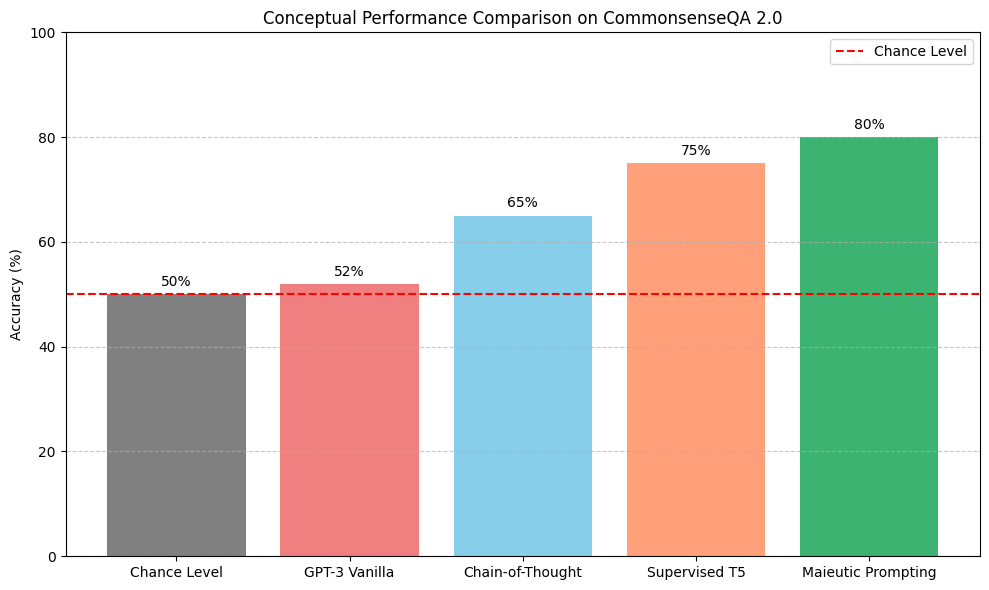

In [6]:
# Conceptual Visualization: Bar Chart of Performance Comparison

try:
    import matplotlib.pyplot as plt
    import numpy as np

    labels = ['Chance Level', 'GPT-3 Vanilla', 'Chain-of-Thought', 'Supervised T5', 'Maieutic Prompting']
    accuracy = [50, 52, 65, 75, 80] # Illustrative accuracies based on lecture claims
    colors = ['gray', 'lightcoral', 'skyblue', 'lightsalmon', 'mediumseagreen']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, accuracy, color=colors)
    plt.ylabel('Accuracy (%)')
    plt.title('Conceptual Performance Comparison on CommonsenseQA 2.0')
    plt.ylim(0, 100)
    plt.axhline(y=50, color='r', linestyle='--', label='Chance Level')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom')

    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except ImportError:
    print("Install matplotlib for visualization: `pip install matplotlib`")
    print("**Conceptual Visualization Description: Bar Chart of Performance**")
    print("Imagine a bar chart displaying accuracy on a commonsense reasoning benchmark.")
    print("-   **X-axis**: Different prompting/training methods (Chance, GPT-3 Vanilla, Chain-of-Thought, Supervised T5, Maieutic Prompting).")
    print("-   **Y-axis**: Accuracy percentage.")
    print("-   **Key Observation**: The bar for 'Maieutic Prompting' would be significantly higher than others, especially surpassing the supervised T5 model, indicating its effectiveness in boosting common sense reasoning robustness in LLMs.")


## 4. Symbolic Knowledge Distillation: Smaller, Smarter Models

**Problem:** State-of-the-art LLMs, despite impressive leaderboard performance, are brittle against adversarial or out-of-domain examples. They often solve 'the dataset' rather than 'the underlying task', exhibiting a 'systematic generalization problem'. This is because they learn surface patterns in language, not robust conceptual understanding of how the world works.


**Core Idea:** To bridge this gap, Symbolic Knowledge Distillation focuses on converting large, general language models into smaller, more robust *causal commonsense models*. It aims to distill valuable, structured common sense knowledge from a powerful but unwieldy teacher model (like GPT-3) into a more efficient student model, often leveraging human-curated knowledge or AI-generated knowledge filtered by a 'critic'.

### 4.1. Defining Common Sense for Machines

Common sense, operationally defined in this context, is the **basic level of practical knowledge and reasoning concerning everyday situations and events that are commonly shared among most people.**


Crucially, it's *not* universal knowledge; it has exceptions based on context (e.g., keeping a fridge door open is bad, but not if it's an unpowered display fridge in a store). This nuanced, context-dependent nature makes it challenging for AI.

In [7]:
def common_sense_rule_with_exception(action, context):
    "Illustrates the context-dependent nature of common sense."
    if action == "keep fridge door open":
        if context == "at home":
            return "Generally NOT OK (food spoils)."
        elif context == "in an unpowered store display":
            return "OK (no food inside, not consuming energy)."
        elif context == "briefly for loading groceries":
            return "Generally OK (temporary, for a purpose)."
    elif action == "talk loudly on phone":
        if context == "in a library":
            return "NOT OK (disturbs others)."
        elif context == "at a bustling market":
            return "OK (expected noise level)."
    return "Context needed to evaluate common sense."

print("**Relatable Examples of Contextual Common Sense:**")
print(f"Action: Keep fridge door open, Context: At home -> {common_sense_rule_with_exception('keep fridge door open', 'at home')}")
print(f"Action: Keep fridge door open, Context: In an unpowered store display -> {common_sense_rule_with_exception('keep fridge door open', 'in an unpowered store display')}")
print(f"Action: Talk loudly on phone, Context: In a library -> {common_sense_rule_with_exception('talk loudly on phone', 'in a library')}")
print(f"Action: Talk loudly on phone, Context: At a bustling market -> {common_sense_rule_with_exception('talk loudly on phone', 'at a bustling market')}")

print("\nThis highlights that common sense isn't a fixed set of universal truths, but a flexible set of 'rules of thumb' that adapt to situations. This complexity is why purely statistical LLMs struggle to acquire it robustly.")

**Relatable Examples of Contextual Common Sense:**
Action: Keep fridge door open, Context: At home -> Generally NOT OK (food spoils).
Action: Keep fridge door open, Context: In an unpowered store display -> OK (no food inside, not consuming energy).
Action: Talk loudly on phone, Context: In a library -> NOT OK (disturbs others).
Action: Talk loudly on phone, Context: At a bustling market -> OK (expected noise level).

This highlights that common sense isn't a fixed set of universal truths, but a flexible set of 'rules of thumb' that adapt to situations. This complexity is why purely statistical LLMs struggle to acquire it robustly.


### 4.2. ATOMIC: The Symbolic Commonsense Knowledge Graph

**ATOMIC (A Ten-Commandments for AI Common Sense)** is a large-scale symbolic common sense knowledge graph. Initially, it was entirely human-crowdsourced, acting as a human demonstration of common sense inferences. It contains millions of 'if-then' rules across 23 different relation types (e.g., preconditions, postconditions, social interactions, physical affordances, hindrances, etc.).


**Example: X gets X's car repaired.**
*   **As a result**: X might call Uber/Lyft; X needs to pay the bill.
*   **Beforehand**: X needs a mechanic, money.
*   **Hindered by**: X totaled the car.
*   **Social Interaction**: X might feel relieved.

ATOMIC serves as a crucial resource for training neural common sense models like COMET.


*Note: This visualization requires `networkx` and `matplotlib`. If running in an environment without these libraries, the graph will not render.*

**Conceptual Visualization: ATOMIC Knowledge Graph Example**


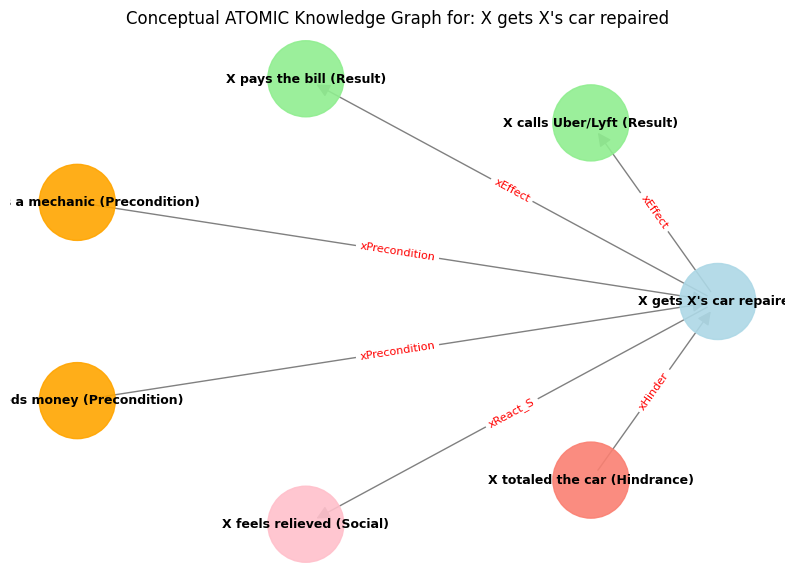

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_atomic_example(event):
    G = nx.DiGraph()
    nodes = [event]
    edges = []
    node_colors_map = {event: 'lightblue'}

    # Example ATOMIC relations for 'X gets X's car repaired'
    if event == "X gets X's car repaired":
        # Define nodes and their colors
        related_nodes = [
            ("X calls Uber/Lyft (Result)", 'lightgreen'),
            ("X pays the bill (Result)", 'lightgreen'),
            ("X needs a mechanic (Precondition)", 'orange'),
            ("X needs money (Precondition)", 'orange'),
            ("X feels relieved (Social)", 'pink'),
            ("X totaled the car (Hindrance)", 'salmon')
        ]
        for n, c in related_nodes:
            nodes.append(n)
            node_colors_map[n] = c

        # Define edges
        edges.extend([
            (event, "X calls Uber/Lyft (Result)", {"label": "xEffect"}),
            (event, "X pays the bill (Result)", {"label": "xEffect"}),
            ("X needs a mechanic (Precondition)", event, {"label": "xPrecondition"}),
            ("X needs money (Precondition)", event, {"label": "xPrecondition"}),
            (event, "X feels relieved (Social)", {"label": "xReact_S"}),
            ("X totaled the car (Hindrance)", event, {"label": "xHinder"})
        ])

    for node in nodes:
        G.add_node(node, color=node_colors_map.get(node, 'gray')) # Add node with color attribute
    for u, v, data in edges:
        G.add_edge(u, v, label=data["label"])

    if not G.nodes():
        print("Graph is empty, cannot draw.")
        return

    try:
        plt.figure(figsize=(10, 7))
        pos = nx.circular_layout(G) # or nx.spring_layout(G)

        node_colors = [G.nodes[node]['color'] for node in G.nodes()]

        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000, alpha=0.9)
        nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')
        nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', arrows=True, arrowsize=20)
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
        plt.title(f"Conceptual ATOMIC Knowledge Graph for: {event}")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Could not render graph. Error: {e}")
        print("\n*Description*: A node for the central event ('X gets X's car repaired') would be in the center. Arrows would radiate outwards to 'result' nodes (e.g., 'X calls Uber'), or inwards from 'precondition' nodes (e.g., 'X needs money'). Other relations like 'xReact_S' (social reaction) or 'xHinder' (hindrance) would also be shown with labeled edges. Different colors for nodes/edges could distinguish relation types (e.g., green for results, orange for preconditions, red for hindrances). This forms a rich, structured representation of common sense for a given event.")

print("**Conceptual Visualization: ATOMIC Knowledge Graph Example**")
visualize_atomic_example("X gets X's car repaired")


### 4.3. COMET vs. GPT-3: The Human Judgment Challenge

**COMET (COmonsense Transformers)** is a neural common sense model trained using ATOMIC. When comparing COMET (built on a smaller model like BART) with GPT-3 (400x larger), human judgment accuracy on generating common sense inferences showed surprising results:

*   **Task**: Given an event and a relation type (e.g., 'X gets car repaired', 'xEffect'), generate a plausible common sense inference.
*   **Results**: COMET (BART-based) significantly outperformed GPT-3 in accuracy, even though GPT-3 showed a large jump over GPT-2. This highlighted that while scale brings general improvements, fine-tuning on structured common sense data (ATOMIC) gives a decisive edge for specific common sense tasks.


*Note: This visualization requires `matplotlib`. If running in an environment without this library, the graph will not render.*

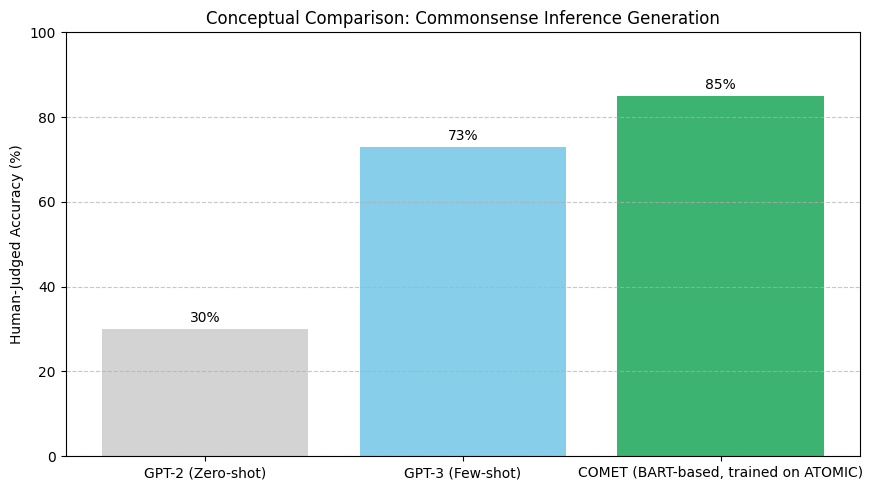

In [9]:
# Conceptual Visualization: Bar Chart of Human Judged Accuracy

try:
    import matplotlib.pyplot as plt
    import numpy as np

    models = ['GPT-2 (Zero-shot)', 'GPT-3 (Few-shot)', 'COMET (BART-based, trained on ATOMIC)']
    accuracy = [30, 73, 85] # Illustrative accuracies based on lecture figures
    colors = ['lightgray', 'skyblue', 'mediumseagreen']

    plt.figure(figsize=(9, 5))
    bars = plt.bar(models, accuracy, color=colors)
    plt.ylabel('Human-Judged Accuracy (%)')
    plt.title('Conceptual Comparison: Commonsense Inference Generation')
    plt.ylim(0, 100)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except ImportError:
    print("Install matplotlib for visualization: `pip install matplotlib`")
    print("**Conceptual Visualization Description: Bar Chart**")
    print("A bar chart would show accuracy levels. GPT-2 would be low, GPT-3 significantly higher, but COMET (trained on ATOMIC) would be the highest, demonstrating the power of focused common sense training data.")


### 4.4. AI-Generated Knowledge Graphs via Symbolic Knowledge Distillation

While human crowdsourcing yielded high-quality ATOMIC data, it hit scalability limits. Symbolic Knowledge Distillation (SKD) proposes a method to automatically generate and refine common sense knowledge graphs using AI itself, aiming for *smaller but better* models than GPT-3.


**Process:**
1.  **Teacher Model (GPT-3 as 'Loose Teacher')**: Use a large LLM (like GPT-3) to generate a vast quantity of common sense inferences (strings). These strings can then be structured into a graph.
2.  **Critic Model (e.g., RoBERTa-based)**: This is a separately trained supervised model (on a moderate amount of human-labeled data, ~10,000 examples) that acts as a 'quality filter'. It's trained to classify whether a machine-generated common sense inference is correct or not.
3.  **Knowledge Filtering**: The critic model aggressively filters out low-quality or 'noisy' generations from the teacher model. Even though this reduces the *quantity* of generated knowledge, it dramatically improves its *quality*.
4.  **Student Model Training**: The filtered, high-quality AI-generated knowledge graph is then used to train a smaller student model (e.g., a fine-tuned BART or similar). This is where the 'distillation' happens.


*Note: This visualization requires `matplotlib`. If running in an environment without this library, the graph will not render.*

--- Knowledge Generation & Filtering (Conceptual) ---
Human-written ATOMIC (ATOMIC 2020 causal subset): 1.0M inferences
GPT-3 Generated (Loose Teacher): 7.0M inferences (Good: 5.1M, Bad: 1.9M)
  Initial GPT-3 Accuracy: 73.0%
Critic Threshold (Aggressiveness): 80.0%
Filtered AI-authored knowledge (Critical Teacher): 4.8M inferences
  Filtered Knowledge Accuracy: 99.2%

*Conceptual Visualization: Knowledge Quality vs. Quantity Chart*



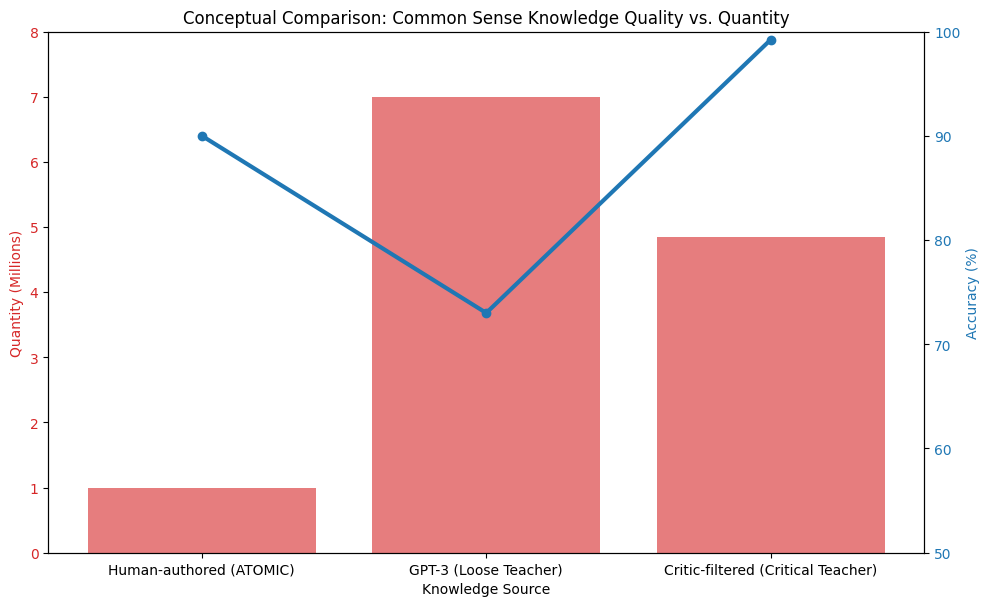

In [10]:
def simulate_knowledge_generation_and_filtering(human_data_qty, gpt3_gen_qty, gpt3_accuracy, critic_threshold):
    "Simulates the quantities and qualities in SKD."
    gpt3_good_qty = gpt3_gen_qty * gpt3_accuracy
    gpt3_bad_qty = gpt3_gen_qty * (1 - gpt3_accuracy)

    # Critic filters out a percentage of total GPT-3 generations based on a threshold
    # Assuming the critic has a certain false positive/negative rate based on its 'aggressiveness'
    # For simplicity, let's say critic retains good_ratio of good, and bad_ratio of bad
    # A high threshold (aggressive critic) means it filters out more, but keeps higher quality.
    # Let's say a high threshold removes 90% of bad, but also 30% of good (false negatives)
    retained_good_after_critic = gpt3_good_qty * (1 - (1 - critic_threshold) * 0.3) # Less good removed with higher threshold
    retained_bad_after_critic = gpt3_bad_qty * (1 - critic_threshold) * 0.1 # More bad removed with higher threshold

    filtered_qty = retained_good_after_critic + retained_bad_after_critic
    filtered_accuracy = retained_good_after_critic / filtered_qty if filtered_qty > 0 else 0

    print("--- Knowledge Generation & Filtering (Conceptual) ---")
    print(f"Human-written ATOMIC (ATOMIC 2020 causal subset): {human_data_qty / 1e6:.1f}M inferences")
    print(f"GPT-3 Generated (Loose Teacher): {gpt3_gen_qty / 1e6:.1f}M inferences (Good: {gpt3_good_qty/1e6:.1f}M, Bad: {gpt3_bad_qty/1e6:.1f}M)")
    print(f"  Initial GPT-3 Accuracy: {gpt3_accuracy*100:.1f}%")
    print(f"Critic Threshold (Aggressiveness): {critic_threshold*100:.1f}%")
    print(f"Filtered AI-authored knowledge (Critical Teacher): {filtered_qty / 1e6:.1f}M inferences")
    print(f"  Filtered Knowledge Accuracy: {filtered_accuracy*100:.1f}%")

    return human_data_qty, gpt3_gen_qty, gpt3_accuracy, filtered_qty, filtered_accuracy

# Parameters based on lecture
human_qty = 1.0 * 10**6 # ~1M for the causal subset
gpt3_raw_gen_qty = 7.0 * 10**6 # ~7M generated by GPT-3
gpt3_raw_accuracy = 0.73 # 73% good for GPT-3
critic_aggressiveness = 0.8 # An aggressive critic setting (e.g., keeping only high confidence items)

human_data, gpt3_data, gpt3_acc, filtered_data, filtered_acc = \
    simulate_knowledge_generation_and_filtering(human_qty, gpt3_raw_gen_qty, gpt3_raw_accuracy, critic_aggressiveness)

print("\n*Conceptual Visualization: Knowledge Quality vs. Quantity Chart*\n")
try:
    import matplotlib.pyplot as plt

    labels = ['Human-authored (ATOMIC)', 'GPT-3 (Loose Teacher)', 'Critic-filtered (Critical Teacher)']
    quantities = [human_data, gpt3_data, filtered_data]
    accuracies = [0.90, gpt3_acc, filtered_acc] # Human-authored is considered very high quality (~90%)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Knowledge Source')
    ax1.set_ylabel('Quantity (Millions)', color=color)
    ax1.bar(labels, [q/1e6 for q in quantities], color=color, alpha=0.6, label='Quantity')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(0, 8)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy (%)', color=color)
    ax2.plot(labels, [a*100 for a in accuracies], color=color, marker='o', linewidth=3, label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(50, 100)

    fig.tight_layout() # otherwise the right y-label is slightly clipped
    plt.title('Conceptual Comparison: Common Sense Knowledge Quality vs. Quantity')
    plt.show()

except ImportError:
    print("Install matplotlib for visualization: `pip install matplotlib`")
    print("**Conceptual Visualization Description: Dual-Axis Bar/Line Chart**")
    print("A chart showing two metrics: quantity (bar chart, Y1 axis) and accuracy (line plot, Y2 axis).")
    print("-   **Human-authored (ATOMIC)**: Moderate quantity, high accuracy.")
    print("-   **GPT-3 (Loose Teacher)**: Very high quantity, but lower accuracy (a lot of 'noisy potion').")
    print("-   **Critic-filtered (Critical Teacher)**: Lower quantity than raw GPT-3 but still more than human-authored, and critically, *higher accuracy* than both human-authored and raw GPT-3. This visually demonstrates the 'smaller but better' outcome.")


### 4.5. Critical Teacher vs. Loose Teacher: Downstream Performance

The most striking finding is the impact on downstream common sense models. Training a student model with the 'Critical Teacher' (GPT-3 + Critic) leads to significantly better performance than training with the raw 'Loose Teacher' (GPT-3 alone) or even human-authored ATOMIC.


*   **Surprising Result**: Unlike typical knowledge distillation where a student model is smaller and *worse*, here the student model becomes *better* than the teacher for the specific task. This is attributed to the shift in model 'type' (from a general language model to a focused common sense model) and the emphasis on knowledge *quality* over *quantity*.
*   **Results**: While GPT-3 (loose teacher) provides some gain, the critical teacher results in downstream neural causal reasoning models (like fine-tuned BART/GPT-2) reaching close to 90% accuracy, a significant improvement over previous baselines.


**Overall Takeaway**: Machine-authored knowledge graphs, when properly distilled and filtered, can be *better* than human-authored ones across criteria like scale, accuracy, and diversity. Quality of data is paramount, not just sheer volume. This approach allows for building smaller, more efficient, and more robust common sense models.


*Note: This visualization requires `matplotlib`. If running in an environment without this library, the graph will not render.*

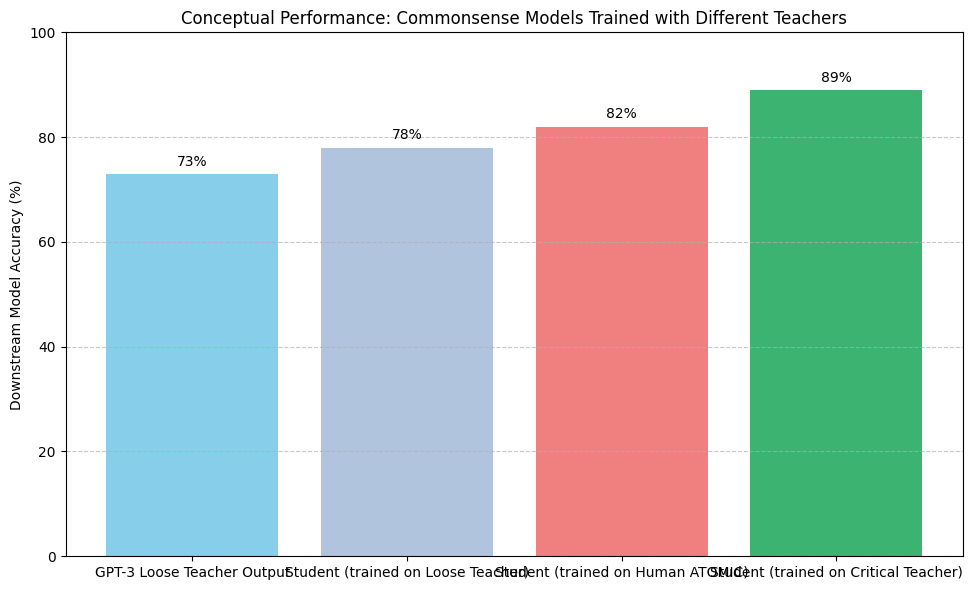

In [11]:
# Conceptual Visualization: Downstream Model Performance

try:
    import matplotlib.pyplot as plt
    import numpy as np

    labels = ['GPT-3 Loose Teacher Output', 'Student (trained on Loose Teacher)',
              'Student (trained on Human ATOMIC)', 'Student (trained on Critical Teacher)']
    accuracy = [73, 78, 82, 89] # Illustrative accuracies based on lecture figures
    colors = ['skyblue', 'lightsteelblue', 'lightcoral', 'mediumseagreen']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, accuracy, color=colors)
    plt.ylabel('Downstream Model Accuracy (%)')
    plt.title('Conceptual Performance: Commonsense Models Trained with Different Teachers')
    plt.ylim(0, 100)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except ImportError:
    print("Install matplotlib for visualization: `pip install matplotlib`")
    print("**Conceptual Visualization Description: Downstream Model Accuracy Chart**")
    print("A bar chart comparing the performance of common sense models (students) trained with different data sources.")
    print("-   **Key Observation**: The model trained with the 'Critical Teacher' (AI-generated + filtered knowledge) achieves the highest accuracy, demonstrating that even a smaller student model can surpass human-curated data and the raw large language model's output when provided with high-quality, targeted knowledge.")


## 5. Commonsense Morality: Introducing Delphi

**Motivation:** Language models are already making judgments and outputs with moral implications, whether explicitly or implicitly. Given their widespread deployment, it's crucial to worry about their moral reasoning. How do we instill human values and ethics into AI?


**Delphi** is a research prototype of a commonsense morality model. Its goal is not to be a moral authority, but to understand and reflect human ethical judgments on everyday situations, aiding in AI safety and alignment.

### 5.1. Delphi: Handling Nuance in Moral Decision-Making

Moral decision-making is complex, requiring weighing conflicting values and understanding compositional situations. Delphi aims to handle various query modes:

*   **Free-form QA**: "Killing a bear." (Wrong) vs. "Killing a bear to save your child." (OK).
*   **Relative QA**: "Stabbing someone with a cheeseburger" (less wrong/rude) vs. "Stabbing someone over a cheeseburger" (wrong). This requires understanding both physical common sense (cheeseburger cannot stab) and linguistic common sense (default tool for stabbing is a knife).
*   **Yes/No Questions**: "Is it OK to fire someone because they're gay?" (No, it's not OK).
*   **Compositional Situations**: "Mowing the lawn" (Expected) -> "Mowing the lawn late at night" (Rude) -> "Mowing the lawn late at night in the middle of nowhere" (OK). Delphi shows surprising robustness to these multi-layered contexts, dynamically adjusting its judgment.

This highlights the deeply intertwined nature of language understanding, common sense, and moral reasoning.

In [12]:
def simulate_delphi_judgment(scenario):
    "Simulates Delphi's moral judgments based on lecture examples and concepts."
    judgments = {
        "Killing a bear.": "It's wrong.",
        "Killing a bear to save your child.": "It's OK.",
        "Killing a bear to please your child.": "It's wrong.",
        "Exploding a nuclear bomb to save your child.": "It's wrong. (Highlights limits/priorities)",
        "Stabbing someone with a cheeseburger.": "It's rude. (Not physically harmful, but odd/disrespectful)",
        "Stabbing someone over a cheeseburger.": "It's wrong. (Implies weapon use, serious harm)",
        "Is it OK to fire someone because they're gay?": "No, it's not OK.",
        "Mowing the lawn.": "It's expected.",
        "Mowing the lawn late at night.": "It's rude.",
        "Mowing the lawn late at night if you live in the middle of nowhere.": "It's OK.",
        "Ignoring a phone call.": "It's rude.",
        "Ignoring an unknown phone call.": "It's OK.",
        "Ignoring a phone call from my friend.": "It's rude.",
        "Ignoring a phone call from my friend after I just had a fight with them.": "It's OK.",
        "Ignoring my boss's phone call during my work hours.": "It's wrong.",
        "Ignoring my boss's phone call during my work hours if I'm in a meeting.": "It's OK.",
        "Mixing bleach with ammonia.": "It's dangerous.",
        "Drinking milk if I'm lactose intolerant.": "It's wrong (for your health).",
        "Drinking soy milk if I'm lactose intolerant.": "It's OK."
    }

    judgment = judgments.get(scenario, "Cannot determine.")
    print(f"Scenario: '{scenario}'")
    print(f"  Delphi's Judgment (simulated): {judgment}")
    print("--------------------------------------------------")

print("**Relatable & Detailed Examples of Delphi's Nuanced Judgments:**")
simulate_delphi_judgment("Killing a bear.")
simulate_delphi_judgment("Killing a bear to save your child.")
simulate_delphi_judgment("Stabbing someone with a cheeseburger.")
simulate_delphi_judgment("Stabbing someone over a cheeseburger.")
simulate_delphi_judgment("Mowing the lawn late at night if you live in the middle of nowhere.")
simulate_delphi_judgment("Ignoring my boss's phone call during my work hours if I'm in a meeting.")

print("\n*Why this is hard*: Each of these scenarios requires understanding not just keywords, but the implied actions, consequences, social norms, and even physical realities. For instance, the 'cheeseburger' example requires knowledge that a cheeseburger isn't a harmful weapon, but 'stabbing over' implies a motive for violence using a default harmful tool (like a knife). This showcases the complex interplay of linguistic, physical, and social common sense required for moral judgments.")

**Relatable & Detailed Examples of Delphi's Nuanced Judgments:**
Scenario: 'Killing a bear.'
  Delphi's Judgment (simulated): It's wrong.
--------------------------------------------------
Scenario: 'Killing a bear to save your child.'
  Delphi's Judgment (simulated): It's OK.
--------------------------------------------------
Scenario: 'Stabbing someone with a cheeseburger.'
  Delphi's Judgment (simulated): It's rude. (Not physically harmful, but odd/disrespectful)
--------------------------------------------------
Scenario: 'Stabbing someone over a cheeseburger.'
  Delphi's Judgment (simulated): It's wrong. (Implies weapon use, serious harm)
--------------------------------------------------
Scenario: 'Mowing the lawn late at night if you live in the middle of nowhere.'
  Delphi's Judgment (simulated): It's OK.
--------------------------------------------------
Scenario: 'Ignoring my boss's phone call during my work hours if I'm in a meeting.'
  Delphi's Judgment (simulated): It's OK

### 5.2. Data Sources: Commonsense Norm Bank

Delphi is trained on the **Commonsense Norm Bank**, a dataset comprising 1.7 million ethical judgments on everyday situations. This bank aggregates data from various existing datasets and automatically compiles them into a QA format.

*   **Key Sources**: Social Chemistry (situations from Reddit with crowd-sourced rules of thumb and moral annotations) and Social Bias Reframe (for countering racism and sexism).
*   **Social Chemistry**: Gathers morally thorny situations from Reddit, then crowd-sources 'rules of thumb' and annotates them with 12 structured attributes (social judgments, cultural pressure, anticipated agreement, moral foundations, etc.).

**Training**: Delphi is built on **Unicorn** (a T5-11B model pretrained on diverse QA problems), which is then further fine-tuned on the Commonsense Norm Bank. This layered approach ensures it benefits from general common sense understanding before specializing in morality.

### 5.3. Challenges & Public Reception

Delphi, upon release, received immense public attention and scrutiny. This highlighted several critical concerns:

*   **Implicit Moral Judgments**: LLMs implicitly make moral judgments even without explicit training. Without guidance, they can amplify biases present in their training data (e.g., GPT-3's problematic responses about fake news or Hitler due to being trained on all of human text).
*   **AI Safety**: Models lacking common sense can suggest dangerous actions (e.g., a home device advising a child to touch a penny to an exposed plug socket). Delphi aimed to filter such harmful outputs.
*   **Misconceptions as a Moral Authority**: Despite disclaimers, some perceived Delphi as an attempt to create an AI 'moral authority' or to replace human judges. The lecture strongly refutes this, stating that an AI learning to interact ethically does not make it a moral authority *over* humans.
*   **The 'Unsafe at Any Accuracy' Argument**: Some argue that moral models are inherently too challenging and unsafe to work on. The counter-argument is that AI systems are *already* morally relevant and will continue to be, so actively working on safety and ethics is better than inaction.
*   **Bias Reflection**: Delphi's judgments were found to be slightly 'left-leaning', reflecting the biases of its crowd-sourced annotators. This underscores the challenge of whose values to encode and the need for value pluralism.


**Key Insight**: Building AI models by relying on 'banned lists' for sensitive topics (like skin color or sexual orientation) is insufficient and a form of discrimination itself. We need to explicitly teach AI human norms and ethics, addressing biases head-on rather than avoiding them. Descriptive ethics (learning from observed human judgments) combined with some top-down ethical principles is crucial.

### 5.4. Delphi Hybrid: Towards Neural-Symbolic Morality

To address major mistakes (e.g., the system mistakenly saying 'genocide if you're creating jobs' is positive because 'creating jobs' is positive), the **Delphi Hybrid** introduces neural-symbolic reasoning. This combines the strengths of neural networks (pattern recognition) with symbolic reasoning (logic and structured knowledge) and top-down ethical frameworks.


**Process:**
1.  **Query Parsing**: Break down complex user queries into smaller, basic events (e.g., 'shooting a bear', 'saving your child').
2.  **Commonsense Inference (COMET Integration)**: Use a common sense model (like COMET, which relies on ATOMIC) to infer the typical consequences or implications of these basic events. This helps identify if any part of the query inherently induces obviously negative or dangerous common sense inferences.
3.  **Reasoning Graph Construction**: Build a graph reminiscent of the Maieutic tree, connecting these inferred events and their relations. This graph incorporates logical and contradictory relationships.
4.  **Constraint Optimization (Max-SAT)**: Apply a Max-SAT solver over this reasoning graph. This enables collective reasoning, ensuring global consistency and allowing the system to make more informed, interpretable moral decisions, guarded against adversarial examples.


This hybrid approach aims to combine the descriptive ethics learned from large datasets with prescriptive ethical rules (e.g., based on Bernard Gert's moral theory framework about what *not* to do), making the model more robust and reliable.


*Note: This visualization requires `networkx` and `matplotlib`. If running in an environment without these libraries, the graph will not render.*


--- Delphi Hybrid Reasoning Flow (Conceptual) for: 'Exploding a nuclear bomb to save your child.' ---
1. Query Parsed into Events: ['explode nuclear bomb', 'save your child']
2. Commonsense Inferences for Events: {'explode nuclear bomb': {'xEffect': ['cause massive destruction', 'kill many people', 'long-term radiation'], 'xReact': ['fear', 'horror'], 'is_negative': True}, 'save your child': {'xEffect': ['child is safe', 'parent feels relief'], 'xReact': ['love', 'protection'], 'is_positive': True}}
3. Reasoning Graph (Conceptual visualization below): Nodes represent events and inferences, edges show relations. Moral conflicts are highlighted.
4. Max-SAT Optimization: Solver weighs positive vs. negative inferences and contradictions.
   - Result: 'Exploding a nuclear bomb' is overwhelmingly negative due to its vast consequences, overriding the positive intent. Judgment: It's wrong.


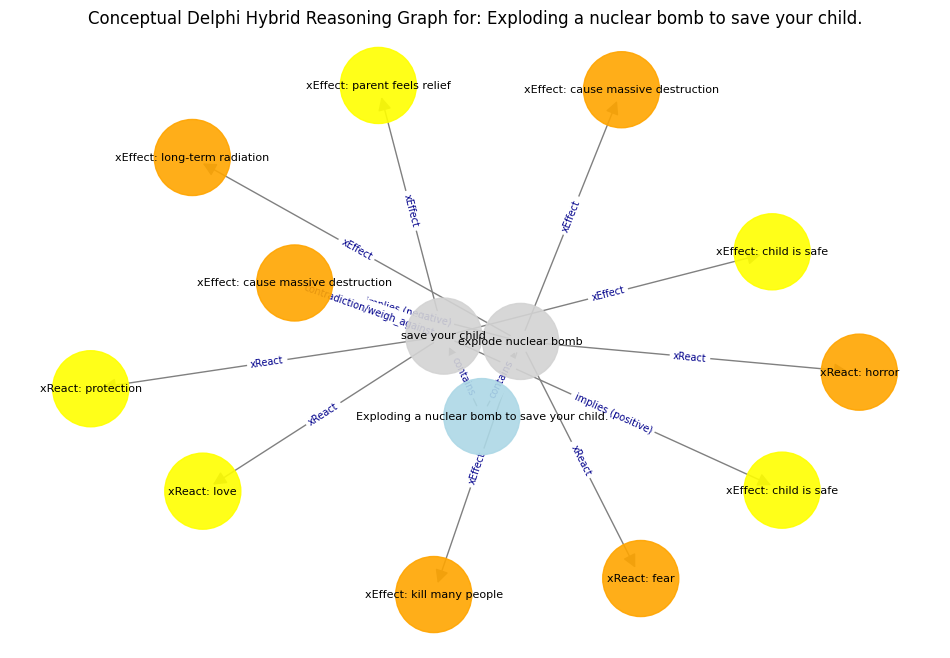


--- Delphi Hybrid Reasoning Flow (Conceptual) for: 'Creating jobs leads to genocide.' ---
1. Query Parsed into Events: ['create jobs', 'genocide']
2. Commonsense Inferences for Events: {'create jobs': {'xEffect': ['economic growth', 'improved livelihoods'], 'xReact': ['happiness', 'prosperity'], 'is_positive': True}, 'genocide': {'xEffect': ['mass killings', 'human suffering', 'destruction of a group'], 'xReact': ['horror', 'condemnation'], 'is_negative': True}}
3. Reasoning Graph (Conceptual visualization below): Nodes represent events and inferences, edges show relations. Moral conflicts are highlighted.
4. Max-SAT Optimization: Solver weighs positive vs. negative inferences and contradictions.
   - Result: The direct link 'leads to' is illogical. The severe negative consequence of 'genocide' overrides the positive 'creating jobs'. Judgment: This statement is illogical and wrong.


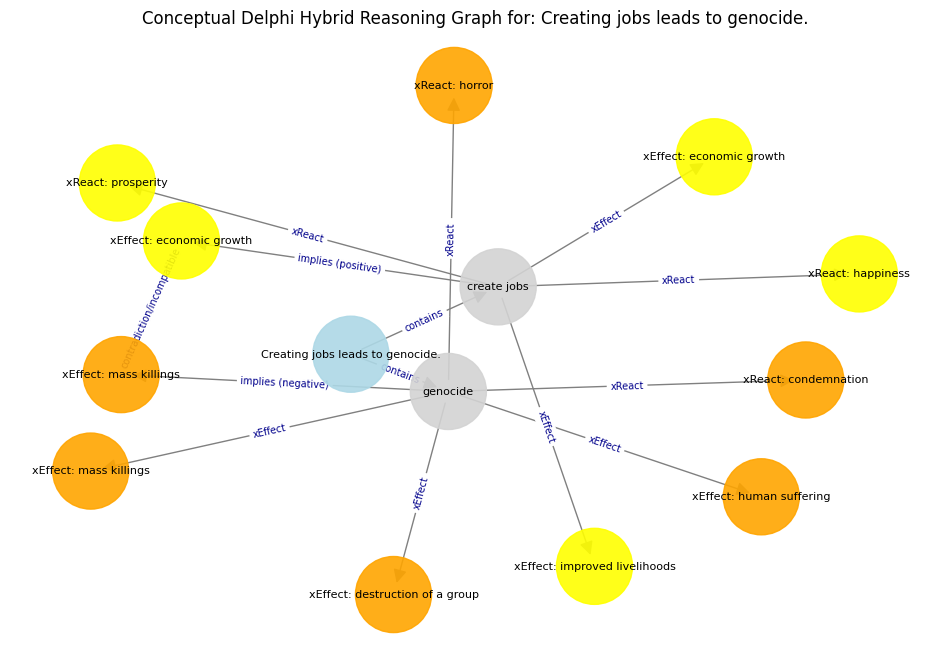

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

def simulate_delphi_hybrid_reasoning(full_query):
    print(f"\n--- Delphi Hybrid Reasoning Flow (Conceptual) for: '{full_query}' ---")

    G = nx.DiGraph()
    G.add_node(full_query, type='query', label=full_query, color='lightblue')

    parsed_events = []
    event_commonsense = {}

    if full_query == "Exploding a nuclear bomb to save your child.":
        parsed_events = [
            "explode nuclear bomb",
            "save your child"
        ]
        event_commonsense = {
            "explode nuclear bomb": {
                "xEffect": ["cause massive destruction", "kill many people", "long-term radiation"],
                "xReact": ["fear", "horror"],
                "is_negative": True
            },
            "save your child": {
                "xEffect": ["child is safe", "parent feels relief"],
                "xReact": ["love", "protection"],
                "is_positive": True
            }
        }

    elif full_query == "Creating jobs leads to genocide.":
        parsed_events = [
            "create jobs",
            "genocide"
        ]
        event_commonsense = {
            "create jobs": {
                "xEffect": ["economic growth", "improved livelihoods"],
                "xReact": ["happiness", "prosperity"],
                "is_positive": True
            },
            "genocide": {
                "xEffect": ["mass killings", "human suffering", "destruction of a group"],
                "xReact": ["horror", "condemnation"],
                "is_negative": True
            }
        }
    else:
        print("Sorry, this query is not pre-defined for Delphi Hybrid simulation.")
        return

    print(f"1. Query Parsed into Events: {parsed_events}")
    print(f"2. Commonsense Inferences for Events: {event_commonsense}")

    for event in parsed_events:
        G.add_node(event, type='event', label=event, color='lightgray')
        G.add_edge(full_query, event, label='contains')

        if event in event_commonsense:
            for rel_type, inferences in event_commonsense[event].items():
                if rel_type.startswith('x'):
                    for inference in inferences:
                        inf_node = f'{rel_type}: {inference}'
                        inf_color = 'yellow' if event_commonsense[event].get('is_positive') else 'orange' if event_commonsense[event].get('is_negative') else 'lightgreen'
                        G.add_node(inf_node, type='inference', label=inf_node, color=inf_color)
                        G.add_edge(event, inf_node, label=rel_type)

    if full_query == "Exploding a nuclear bomb to save your child.":
        # Ensure nodes exist before adding edges
        if "cause massive destruction" not in G: G.add_node("cause massive destruction", type='inference', label="xEffect: cause massive destruction", color='orange')
        if "child is safe" not in G: G.add_node("child is safe", type='inference', label="xEffect: child is safe", color='yellow')

        G.add_edge("explode nuclear bomb", "cause massive destruction", label="implies (negative)")
        G.add_edge("save your child", "child is safe", label="implies (positive)")
        G.add_edge("cause massive destruction", "save your child", label="contradiction/weigh_against", color='red')
    elif full_query == "Creating jobs leads to genocide.":
        if "economic growth" not in G: G.add_node("economic growth", type='inference', label="xEffect: economic growth", color='yellow')
        if "mass killings" not in G: G.add_node("mass killings", type='inference', label="xEffect: mass killings", color='orange')

        G.add_edge("create jobs", "economic growth", label="implies (positive)")
        G.add_edge("genocide", "mass killings", label="implies (negative)")
        G.add_edge("economic growth", "mass killings", label="contradiction/incompatible", color='red')

    print("3. Reasoning Graph (Conceptual visualization below): Nodes represent events and inferences, edges show relations. Moral conflicts are highlighted.")

    print("4. Max-SAT Optimization: Solver weighs positive vs. negative inferences and contradictions.")
    if full_query == "Exploding a nuclear bomb to save your child.":
        print("   - Result: 'Exploding a nuclear bomb' is overwhelmingly negative due to its vast consequences, overriding the positive intent. Judgment: It's wrong.")
    elif full_query == "Creating jobs leads to genocide.":
        print("   - Result: The direct link 'leads to' is illogical. The severe negative consequence of 'genocide' overrides the positive 'creating jobs'. Judgment: This statement is illogical and wrong.")

    if not G.nodes():
        print("Graph is empty, cannot draw.")
        return

    try:
        plt.figure(figsize=(12, 8))
        node_colors = [G.nodes[node]['color'] for node in G.nodes()]
        node_labels = nx.get_node_attributes(G, 'label')

        pos = nx.spring_layout(G, k=0.9, iterations=50)
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000, alpha=0.9)
        nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

        edge_colors = [G[u][v].get('color', 'gray') for u,v in G.edges()]
        nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, arrows=True, arrowsize=20)

        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkblue', font_size=7)
        plt.title(f'Conceptual Delphi Hybrid Reasoning Graph for: {full_query}')
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f'Could not render graph. Error: {e}')
        print("\n*Conceptual Visualization Description*: A graph diagram would show the query broken into events, which link to their common sense inferences (e.g., 'explode bomb' -> 'mass destruction'). Edges would indicate causal links or relationships. Crucially, conflicting moral implications (e.g., the positive of 'saving child' versus the extreme negative of 'nuclear bomb') would be shown as 'contradiction' or 'weigh_against' edges, possibly in red, which the Max-SAT solver then resolves.")

simulate_delphi_hybrid_reasoning("Exploding a nuclear bomb to save your child.")
simulate_delphi_hybrid_reasoning("Creating jobs leads to genocide.")


## 6. Future Directions and Ethical Considerations

The journey towards truly common sense and morally aligned AI is long and complex. Several crucial discussions and directions emerged from the lecture's Q&A:

*   **AI Safety, Equity, Morality as a Continuum**: These are not separate challenges but deeply intertwined. The core issue remains: *whose moral values do we incorporate?*
*   **Value Pluralism**: The ideal approach is to embrace value pluralism, acknowledging and respecting diverse cultures and individual preferences, rather than enforcing a single moral framework. AI should learn to understand that a distribution of opinions exists for certain questions, while still denying harmful conspiracy theories or universally condemned acts.
*   **Collaboration across Disciplines**: Significant progress requires collaboration between AI researchers, humanities scholars (philosophy, psychology), and policymakers to define universal core human values and respectfully integrate particulars.
*   **Data Quality & Sharing**: High-quality, diverse human annotation and feedback data are crucial for training ethical AI. The current lack of sharing from tech companies hinders community-wide progress. This data needs explicit teaching, as models cannot learn morals on their own from raw text.
*   **Critique Models**: Investing more in 'critique models' that can fact-check and filter problematic outputs from generative models is vital. This is akin to humans 'thinking before they speak'.
*   **Common Sense as Emergent vs. Engineered**: While some common sense capabilities emerge from large language models, they are fundamentally *language models*, not *knowledge models*. A true conceptual understanding of the world requires explicit focus on building knowledge models, rather than solely relying on predictive text generation paradigms.

### Conclusion

The Stanford CS25 lecture on Common Sense Reasoning underscores that despite the dazzling capabilities of modern LLMs, they possess fundamental limitations in common sense, consistency, and ethical reasoning. However, innovative approaches like Maieutic Prompting and Symbolic Knowledge Distillation, along with dedicated efforts in commonsense morality (Delphi), offer promising pathways to imbue AI with deeper, more robust, and safer reasoning abilities. The future lies not just in scaling models, but in smart algorithms, high-quality data, and interdisciplinary collaboration to align AI with human values.